In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data_clusters.csv")
author_data.index=author_data.id
author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
author_data.sample(20)

,gender,age,topic,sign,grupo_edad,Freq
id,,,,,,
445935,male,26,Agriculture,Pisces,B,233
3927867,male,16,Student,Cancer,A,4
3750679,female,46,indUnk,Libra,C,2
3672318,male,17,Engineering,Aries,A,5
3965275,female,15,indUnk,Capricorn,A,4
3093675,female,14,Student,Sagittarius,A,26
3398614,female,42,indUnk,Libra,C,4
3802222,female,13,Student,Gemini,A,12
946506,female,25,Education,Aquarius,B,7


In [3]:
tfidf_data=pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")#_2# This dataframe is already normalized to max val
# tfidf_data.index=author_data.id
# # author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
tfidf_data.sample(20)

,00,000,10,100,11,12,13,14,15,16,...,ya,yay,yea,yeah,year,years,yes,yesterday,york,young
id,,,,,,,,,,,,,,,,,,,,,
3865520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3737807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1593902,0.000000,0.000000,0.012989,0.004139,0.007045,0.007333,0.004725,0.003588,0.006942,0.015518,...,0.008044,0.000000,0.000000,0.011708,0.031184,0.010735,0.009455,0.000000,0.0,0.000000
3367290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001967,0.000000,0.002127,0.0,0.000000
3445665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3407461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1232234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3689779,0.000000,0.010793,0.000000,0.000000,0.007123,0.003613,0.000000,0.016015,0.000000,0.002929,...,0.000000,0.000000,0.000000,0.000000,0.012804,0.001929,0.000000,0.000000,0.0,0.011162
3927641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006562


In [4]:
author_data=author_data.loc[tfidf_data.index,:]# select sample tfidf matrix /// Cuando la matriz viene de una muestra

In [5]:
# author_data.Freq=author_data.Freq/author_data.Freq.max() # Normalizar frecuencia de publicaciones

In [6]:
# enco_cath=pd.get_dummies(author_data[["gender","grupo_edad"]]).astype("float64")

In [7]:
# enco_cath=enco_cath.loc[:,["gender_female","grupo_edad_A","grupo_edad_B","grupo_edad_C"]]

In [8]:
# author_data_norm=enco_cath.join(author_data.Freq)
# author_data_norm=author_data_norm.join(tfidf_data)

In [9]:
# author_data_norm.sample(20)

# Clustering

In [10]:
# auth_ward_full=hierarchy.linkage(author_data_norm, 'ward')#tfidf_data

In [11]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(auth_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram')
# plt.show()

In [12]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=3, n_jobs=-1).fit_transform(tfidf_data)#author_data_norm)#

In [13]:
auth_ward_3=hierarchy.linkage(spect_emb_3, 'ward')

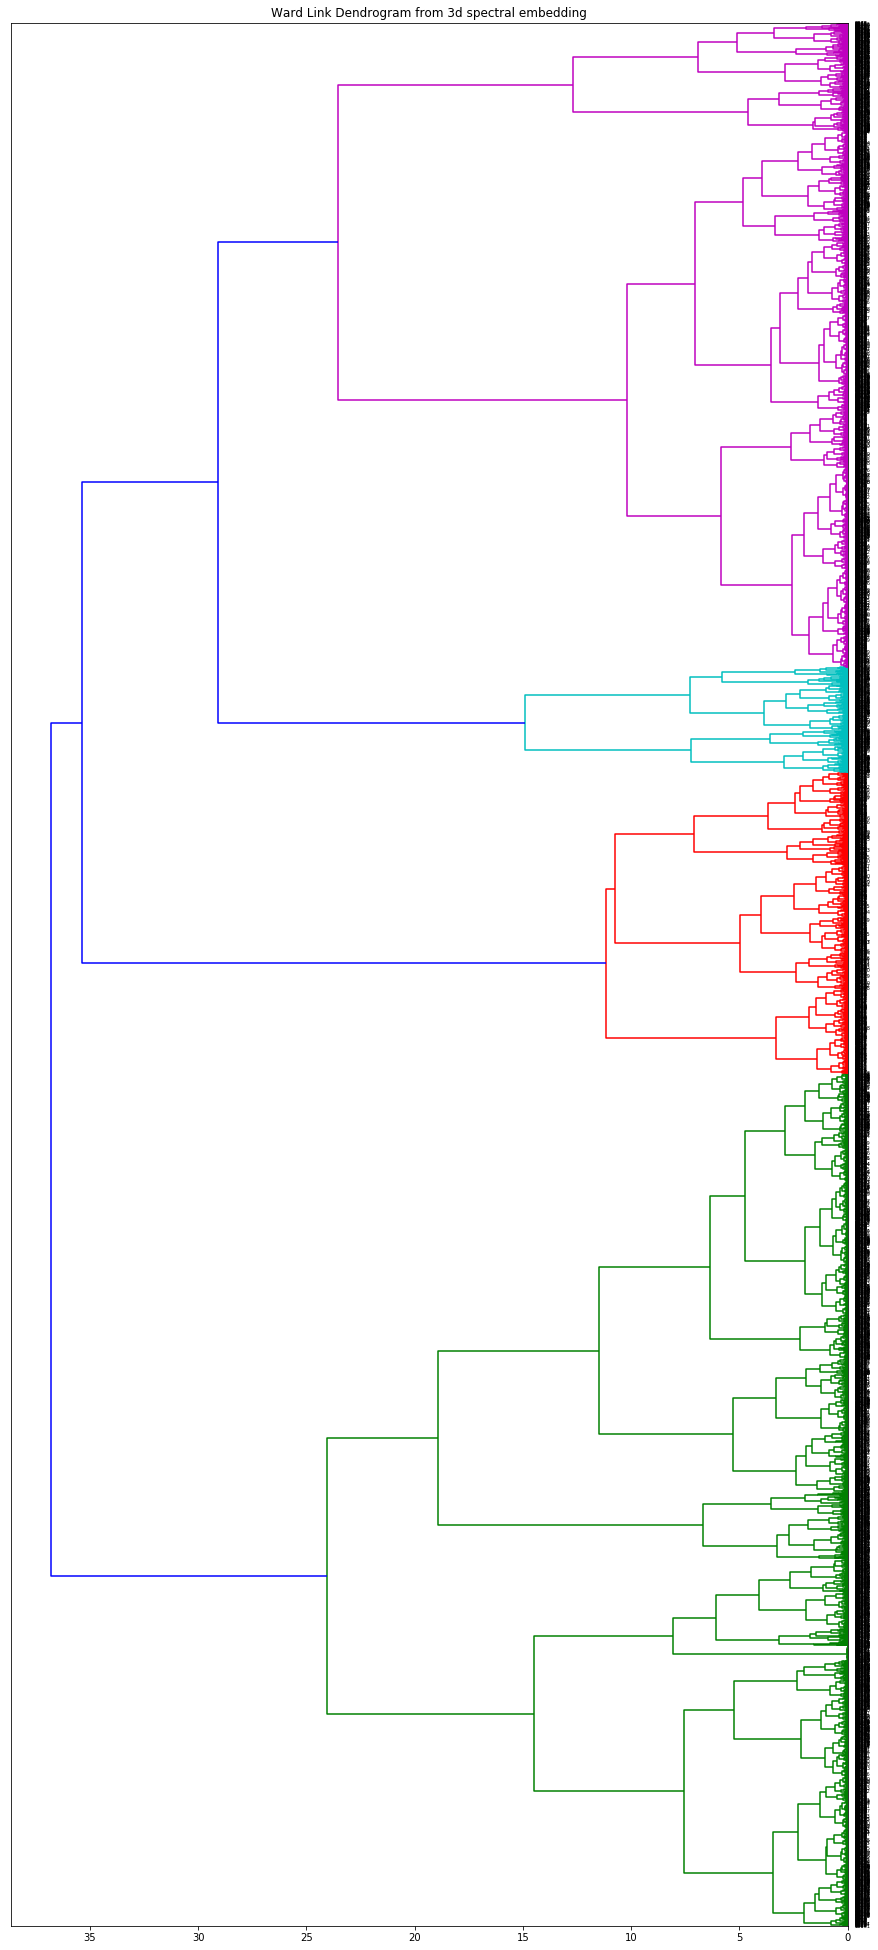

In [14]:
plt.figure(figsize=(15,35))
dn_tf_3=hierarchy.dendrogram(auth_ward_3,orientation="left")
plt.title('Ward Link Dendrogram from 3d spectral embedding')
plt.show()

In [15]:
clustering_3d_ward = AgglomerativeClustering(linkage='ward', n_clusters=6)
clustering_3d_ward.fit(spect_emb_3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func=<function mean at 0x00000234D5839D08>)

In [16]:
pd.crosstab(index=clustering_3d_ward.labels_, columns="count")

col_0,count
row_0,
0,3100
1,670
2,1921
3,688
4,2342
5,3420


In [17]:
# spect_emb_3=spect_emb_3*1000

Text(0.5, 1.0, '2d spectral coordinates from 3d spectral hierarchical (ward) clustering')

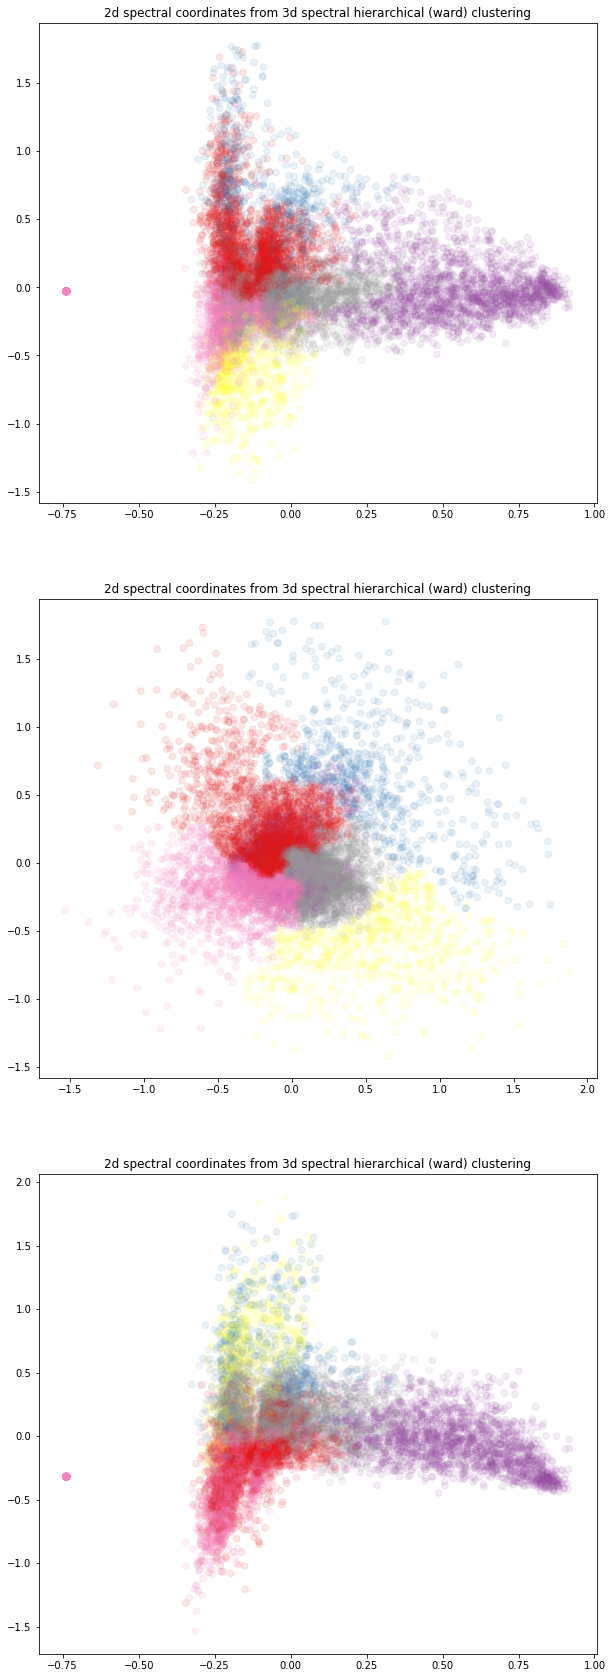

In [18]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

In [19]:
# # Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=spect_emb_3[:,0],
#            ys=spect_emb_3[:,1],
#            zs=spect_emb_3[:,2],
#            c=clustering_3d_ward.labels_, 
#            alpha=0.35,
#            cmap=plt.cm.Set1)
# plt.title("Ward's hierarchical clustering from spectral embedding" )
# # plt.axis('off') # remove axes for visual appeal

# def rotate(angle):
#     ax.view_init(azim=angle)

# print("Making animation")
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# print("Saving Movie File")
# rot_animation.save('cluster_anim_2.mp4', writer=writer)
# print("Saving animated GIF File")
# rot_animation.save('whljgr_clustering_2.gif', dpi=80, writer='imagemagick')

In [20]:
author_data["cluster"]=clustering_3d_ward.labels_
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [21]:
author_data.head(30)

,gender,age,topic,sign,grupo_edad,Freq,cluster,embd_x_coord,embd_y_coord,embd_z_coord
id,,,,,,,,,,
665500,male,35,indUnk,Aries,C,789,2,0.820946,0.036276,-0.384345
1690553,male,17,Student,Scorpio,A,177,2,0.271200,-0.108108,-0.170754
2191528,female,14,Arts,Cancer,A,66,2,0.318842,0.519239,-0.163354
993945,female,25,HumanResources,Leo,B,228,2,0.816085,-0.164705,-0.334432
3931639,female,33,indUnk,Aries,C,135,2,0.451838,0.010587,-0.132722
3607330,male,39,indUnk,Leo,C,41,4,-0.020561,-0.332737,-0.016218
3749504,female,17,Student,Pisces,A,45,5,-0.035214,-0.163511,0.244574
1769576,male,26,Arts,Aquarius,B,191,2,0.808073,-0.172290,-0.302282
2059313,male,26,Student,Leo,B,400,2,0.772163,-0.113837,-0.215592


In [22]:
author_data.to_csv("author_data_clusters_2.csv")

# Explore Clusters

In [23]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

cluster,0,1,2,3,4,5
topic,,,,,,
Accounting,15,4,15,3,12,18
Advertising,12,2,12,6,18,31
Agriculture,10,2,5,0,1,7
Architecture,12,0,0,5,14,15
Arts,88,14,100,30,92,142
Automotive,6,2,2,2,8,7
Banking,15,0,15,2,27,15
Biotech,6,1,7,1,9,7
BusinessServices,21,4,17,3,23,24


In [24]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

cluster,0,1,2,3,4,5
grupo_edad,,,,,,
A,1829,586,643,208,552,1279
B,969,77,991,331,1213,1643
C,302,7,287,149,577,498


In [25]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

cluster                          0    1    2    3    4    5
topic              grupo_edad                              
Accounting         A             1    1    2    0    0    3
                   B            14    3   10    1    8   12
                   C             0    0    3    2    4    3
Advertising        A             0    1    0    0    1    0
                   B            10    1    9    5   12   25
                   C             2    0    3    1    5    6
Agriculture        A             6    2    0    0    0    4
                   B             2    0    5    0    1    2
                   C             2    0    0    0    0    1
Architecture       A             3    0    0    0    1    2
                   B             7    0    0    3   11   10
                   C             2    0    0    2    2    3
Arts               A            38   11   22    5    9   40
                   B            35    3   60   19   48   76
                   C            15    0   18    6   35   26
Automotive         A             1    1    0    1    2    3
                   B             4    1    1    0    5    1
                   C             1    0    1    1    1    3
Banking            A             1    0    0    0    0    0
                   B            11    0   14    1   20   13
                   C             3    0    1    1    7    2
Biotech            A             2    1    4    0    1    3
                   B             4    0    1    1    5    4
                   C             0    0    2    0    3    0
BusinessServices   A             6    2    0    2    2    1
                   B            11    2   15    1   14   17
                   C             4    0    2    0    7    6
Chemicals          A             8    0    5    0    3    2
                   B             5    2    4    0    1    5
                   C             0    0    0    0    0    2
...                            ...  ...  ...  ...  ...  ...
RealEstate         A             3    0    2    0    0    0
                   B             3    1    4    0    2    5
                   C             1    0    1    1    2    3
Religion           A             3    1    3    2    1    5
                   B             9    1    7    8    4   18
                   C             6    0    5    1    5    7
Science            A             8    0    2    2    2    3
                   B            15    0   22    2   20   22
                   C             4    0    0    1    3    5
Sports-Recreation  A            15    5    3    3    0    3
                   B             4    1    5    1    8    6
                   C             2    0    1    0    0    1
Student            A           942  265  332  107  288  664
                   B           115   12  109   35  129  183
                   C             6    0    4    2   14    4
Technology         A            18    0    4    1   13    9
                   B            84    3   48   21  136  104
                   C            35    1   22   16   76   31
Telecommunications A             0    1    1    0    0    1
                   B             5    0   12    4   12   15
                   C             4    0    3    2    8    2
Tourism            A             2    0    2    0    0    5
                   B             9    3    4    4    9    9
                   C             2    0    2    0    2    3
Transportation     A             1    1    1    0    2    2
                   B             6    1    2    3    8   11
                   C             2    0    5    0   10   10
indUnk             A           614  247  204   76  174  418
                   B           333   29  362  122  363  602
                   C           111    6  122   60  185  204

[120 rows x 6 columns]

In [26]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [27]:
enumerate(list(set(author_data.cluster)))

Text(0.5, 0.92, "Ward's hierarchical clustering from spectral embedding")

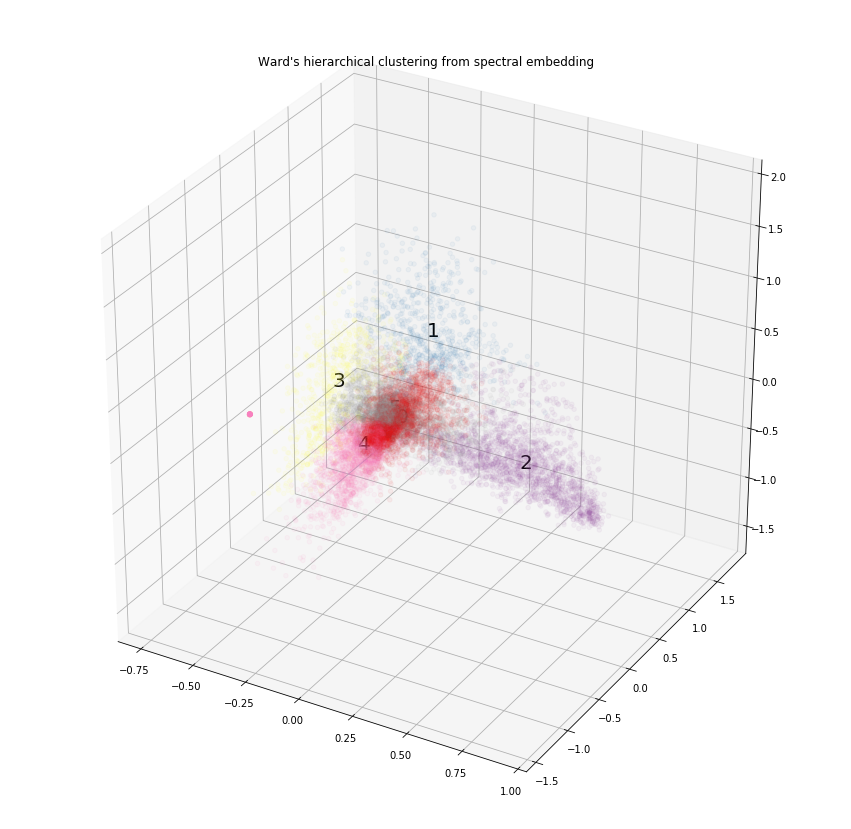

In [28]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.05,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )

# Wordclouds

In [29]:
# tfidf_data=pd.read_csv("df_out.csv",header=0,index_col="id")
# del tfidf_data['Unnamed: 0']
# tfidf_data.sample(20)
# tfidf_data.shape

In [30]:
author_tfidf=pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")
del author_tfidf['don']
del author_tfidf['just']
print(author_tfidf.shape)
author_tfidf.sample(20)

(12141, 998)


,00,000,10,100,11,12,13,14,15,16,...,ya,yay,yea,yeah,year,years,yes,yesterday,york,young
id,,,,,,,,,,,,,,,,,,,,,
2952149,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.003499,0.000000,0.000000,0.003891,0.0,0.000000
4190502,0.0,0.000000,0.000000,0.000000,0.000000,0.004463,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3905710,0.0,0.000000,0.002127,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3798944,0.0,0.000000,0.004372,0.005858,0.000000,0.005097,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.001306,0.001853,0.009394,0.0,0.000000
4099324,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3533366,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
232317,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.032265,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4289692,0.0,0.000000,0.002051,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3444092,0.0,0.000000,0.000000,0.000000,0.000000,0.003652,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.007465,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [31]:
author_data=pd.read_csv("author_data_clusters_2.csv",header=0,index_col="id")
print(author_data.shape)
author_data.sample(20)

(12141, 10)


,gender,age,topic,sign,grupo_edad,Freq,cluster,embd_x_coord,embd_y_coord,embd_z_coord
id,,,,,,,,,,
3152817,male,17,Student,Scorpio,A,36,5,0.083573,-0.317212,0.146643
3455718,female,16,BusinessServices,Virgo,A,7,4,-0.092678,-0.270426,-0.018971
639335,male,26,indUnk,Virgo,B,43,4,-0.092257,-0.091529,-0.073776
4023160,female,15,indUnk,Aquarius,A,11,4,-0.066667,-0.173313,-0.009792
3186591,female,26,Law,Leo,B,114,2,0.553890,-0.222297,-0.071951
3395874,male,17,Student,Aquarius,A,7,4,-0.252147,0.052695,-0.547203
1000866,female,17,Student,Libra,A,770,2,0.839910,0.077870,-0.309471
3525495,female,16,indUnk,Leo,A,5,5,-0.176492,-0.353740,0.041196
3793386,male,37,InvestmentBanking,Scorpio,C,176,5,0.074705,-0.423446,-0.041962


In [32]:
clrs_wrdcld=matplotlib.colors.LinearSegmentedColormap.from_list("", [#'#a50026',
                                                                     '#d73027',
                                                                     '#f46d43',
                                                                     '#fdae61',
#                                                                      '#fee090',
#                                                                      '#ffffbf',
#                                                                      '#e0f3f8',
#                                                                      '#abd9e9',
                                                                     '#74add1',
                                                                     '#4575b4',
                                                                     '#313695'])

In [33]:
pic_wide=900
def wrd_cld_dic_clust(clust_labels,clust_id,top_n=300):
    txt_freqs= author_tfidf[clust_labels==clust_id].sum(axis=0)
    indices = np.argsort(txt_freqs)[::-1]
    features =list(author_tfidf.columns)
    top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
    fr_dic={ str(features[i]).upper():txt_freqs[i] for i in indices[:top_n]}
    wc = WordCloud(width=pic_wide,  height=int(pic_wide*(9/21)), 
               background_color=None, mode="RGBA",min_font_size=8,
               colormap=clrs_wrdcld)#Dark2_r)#Paired_r)#tab10_r)#Set1_r) #
    wc.generate_from_frequencies(fr_dic)
    return wc

(-0.5, 899.5, 384.5, -0.5)

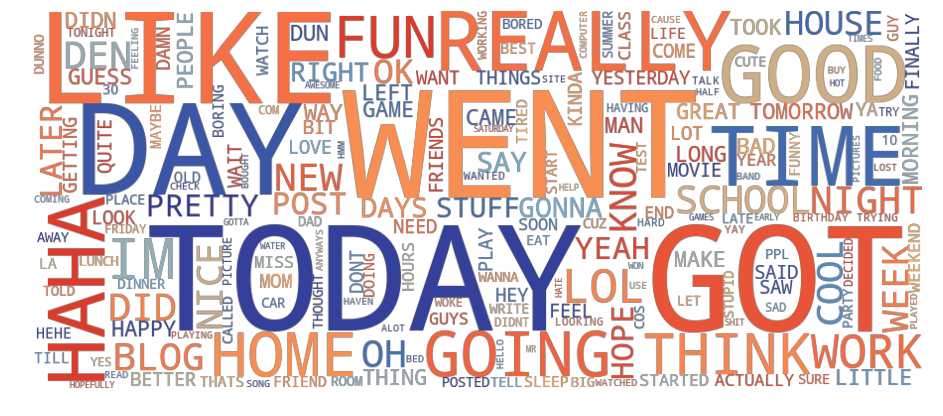

In [34]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,0,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

(-0.5, 899.5, 384.5, -0.5)

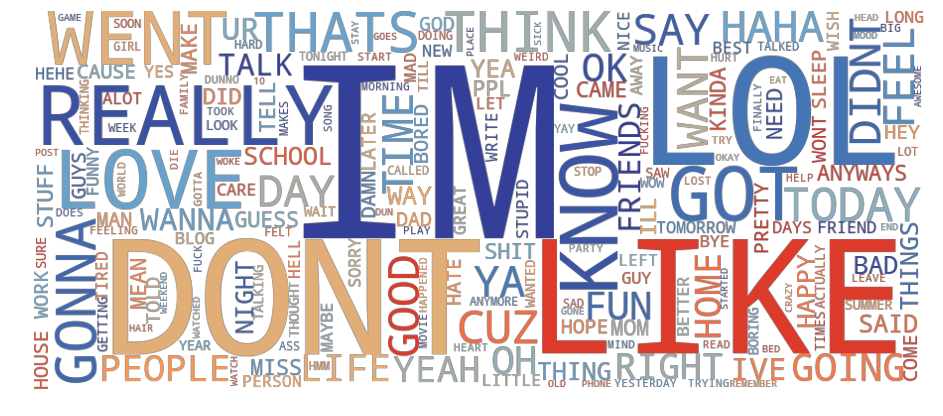

In [35]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,1,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

(-0.5, 899.5, 384.5, -0.5)

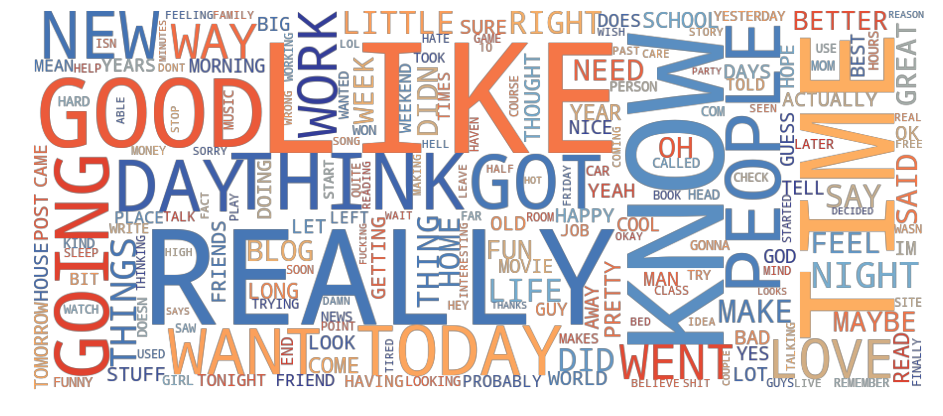

In [36]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,2,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

(-0.5, 899.5, 384.5, -0.5)

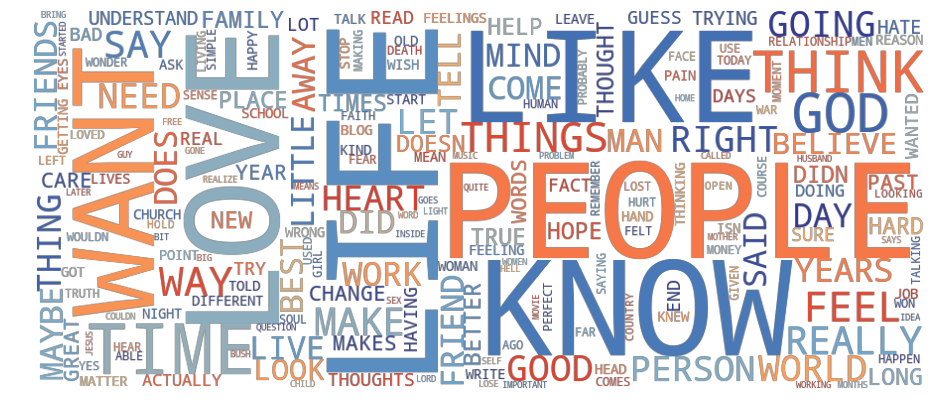

In [37]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,3,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

(-0.5, 899.5, 384.5, -0.5)

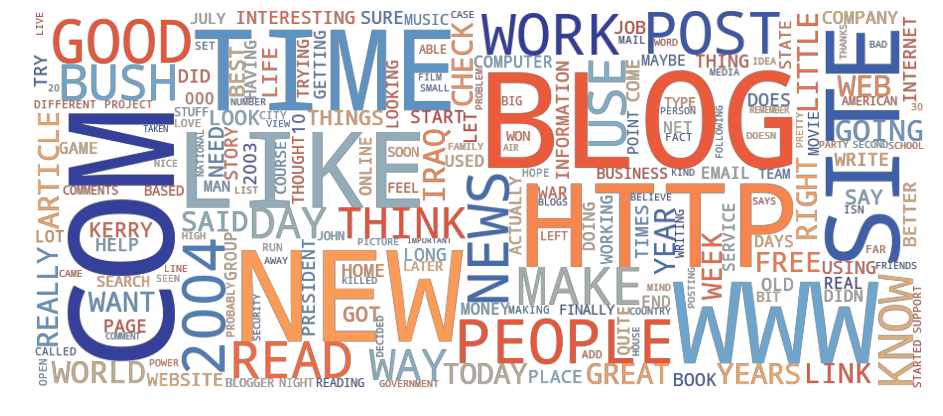

In [38]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,4,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

(-0.5, 899.5, 384.5, -0.5)

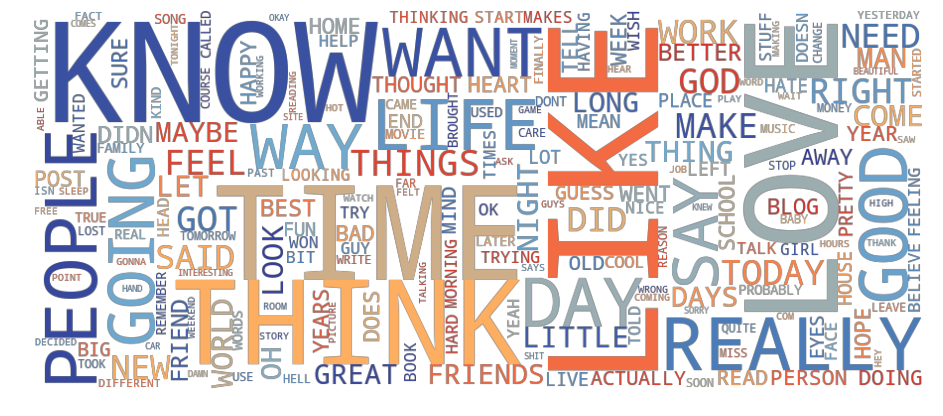

In [39]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,5,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')